<h1><center>Usage</center></h1>
<h3>
    Load data  <br>
    Vectorize using NSPDK   <br>
    Reduce the dimensionality using PCA  <br>
    Evluation
</h3>

In [1]:
from sklearn.decomposition import TruncatedSVD
from eden.graph import vectorize
import numpy as np
import umap


from evaluate import Evaluate
import load_data as ld

In [3]:
#load the folder MUTAG
name="AIDS"
#load the data
graphs_label = ld.load_data(name)
graphs_label = np.array(graphs_label)

# get graphs and labels
graphs = graphs_label[:,0]
labels = graphs_label[:,1]

# dimension of the last embedding
dimension_embedding = 2

In [4]:
# Vectorize using EDEN
X = vectorize(graphs, complexity=12)
# Reduct the dimensionality using PCA
Xd = TruncatedSVD(n_components = dimension_embedding).fit_transform(X)

Create an Obj Evaluate passing graphs, label and dimension of the test set

In [5]:
e = Evaluate(Xd,labels,0.3)

Fit the model

In [6]:
number_neighbour = 1
k_fold_validation = 10
model, score_train = e.fit(number_neighbour,k_fold_validation)

# score obtained in k-fold validation using k fold
print(score_train)

[0.97163121 0.97163121 0.97163121 0.95714286 0.99285714 0.97857143
 0.97142857 0.97841727 0.97122302 0.97122302]


Predict the data in the test set

In [7]:
y_pred = e.predict()
print(y_pred[0:5])

[array([1]), array([1]), array([1]), array([0]), array([1])]


Compute the accuracy of the model

In [8]:
accuracy = e.evaluate()
print(accuracy)

0.9833333333333333


Show a report of the model

Scores in bulding the model using K-fold validations:
	 0.9716
	 0.9716
	 0.9716
	 0.9571
	 0.9929
	 0.9786
	 0.9714
	 0.9784
	 0.9712
	 0.9712

	 mean: 0.9736
	 variance: 0.0001


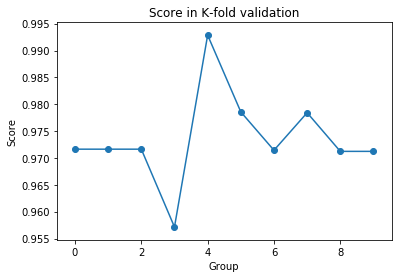


 
 Results on test Set:
	 Accuracy: 0.9833
	 Precision: 0.9897
	 Recall: 0.9897
	 F1_score: 0.9897
Normalized confusion matrix


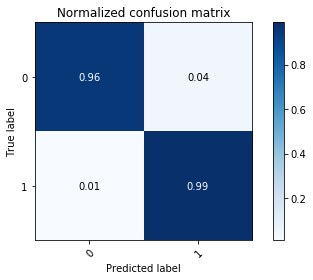

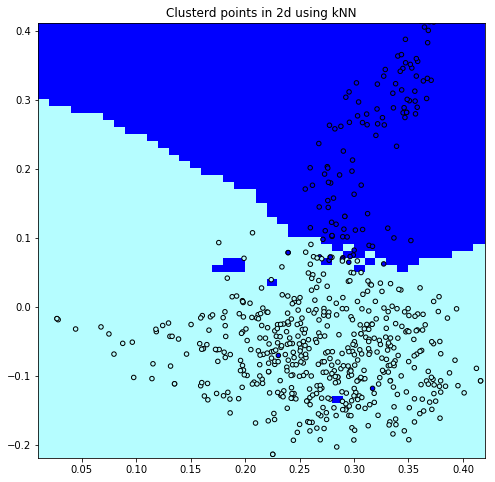

In [9]:
e.report()

## Using UMAP instead of PCA

Scores in bulding the model using K-fold validations:
	 0.9787
	 0.9716
	 1.0000
	 0.9714
	 0.9786
	 1.0000
	 0.9786
	 1.0000
	 0.9856
	 0.9568

	 mean: 0.9821
	 variance: 0.0002


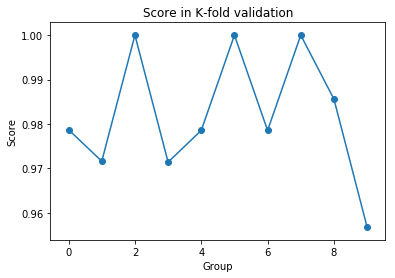


 
 Results on test Set:
	 Accuracy: 0.9900
	 Precision: 0.9959
	 Recall: 0.9918
	 F1_score: 0.9938
Normalized confusion matrix


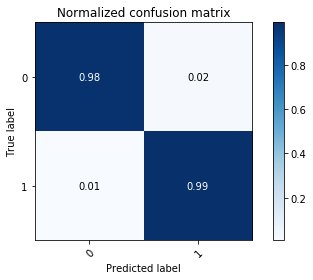

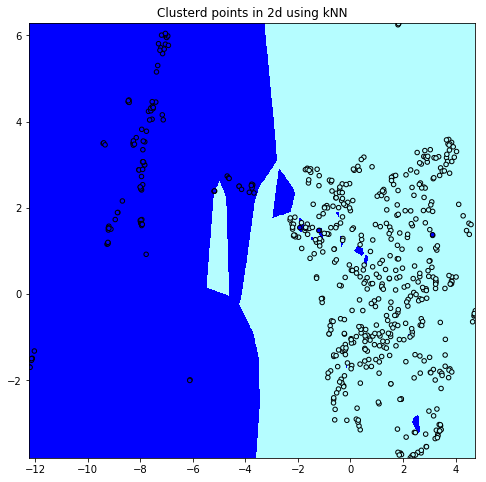

In [10]:
Xd = umap.UMAP(n_components=2).fit_transform(X)
e = Evaluate(Xd,labels,0.3)
model, score_train = e.fit(number_neighbour,k_fold_validation)
y_pred = e.predict()
accuracy = e.evaluate()
e.report()